In [1]:
print("Hello World :)")

Hello World :)


In [2]:
get_ipython().system('pip install db-dtypes')

In [3]:
import os
import pandas
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

In [4]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [5]:
query_get_tables = """
SELECT * 
FROM `ironhacks-data.ironhacks_competition.INFORMATION_SCHEMA.TABLES`
"""
query_job = bigquery_client.query(query_get_tables)
query_job.to_dataframe().head()

,table_catalog,table_schema,table_name,table_type,is_insertable_into,is_typed,creation_time,base_table_catalog,base_table_schema,base_table_name,snapshot_time_ms,ddl,default_collation_name,upsert_stream_apply_watermark
0,ironhacks-data,ironhacks_competition,wage_data,BASE TABLE,YES,NO,2022-11-29 17:00:10.578000+00:00,None,None,None,NaT,CREATE TABLE `ironhacks-data.ironhacks_competi...,NULL,NaT
1,ironhacks-data,ironhacks_competition,prediction_list,BASE TABLE,YES,NO,2022-11-29 17:00:10.722000+00:00,None,None,None,NaT,CREATE TABLE `ironhacks-data.ironhacks_competi...,NULL,NaT
2,ironhacks-data,ironhacks_competition,unemployment_data,BASE TABLE,YES,NO,2022-11-29 17:00:14.588000+00:00,None,None,None,NaT,CREATE TABLE `ironhacks-data.ironhacks_competi...,NULL,NaT


In [6]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [7]:
query_job = bigquery_client.query(query)
unemployment_data = query_job.to_dataframe()
unemployment_data.head(2)

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0


In [8]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [9]:
query_job = bigquery_client.query(query)
prediction_list_data = query_job.to_dataframe()
prediction_list_data.head(2)

,uu_id,week_number
0,5bf51fc2e162d6faf9e3cf79e4198378,44
1,420b44cc7e3f55d738df565421e59941,44


In [10]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data`
"""

In [11]:
query_job = bigquery_client.query(query)
wage_data = query_job.to_dataframe()
wage_data.head(2)

,uu_id,countyfips,tract,tract_name,average_wage
0,585f8731c2255d6b3f817a31180848b9,18177,200,"Census Tract 2, Wayne County, Indiana",6612.00
1,8c9d2aa90948679972a9382aadcc6001,18177,900,"Census Tract 9, Wayne County, Indiana",9883.25


In [12]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
WHERE uu_id IN (SELECT uu_id
                FROM `ironhacks-data.ironhacks_competition.prediction_list`
                WHERE week_number = (SELECT MAX(week_number) FROM `ironhacks-data.ironhacks_competition.prediction_list`))
ORDER BY uu_id,week_number
"""

In [13]:
query_job = bigquery_client.query(query)
relevant_unemployment_df = query_job.to_dataframe()
relevant_unemployment_df.head(2)

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,001cd9ae23064d7f0fd3cd327c873d8d,20220730,31,18099,20102,"Census Tract 201.02, Marshall County, Indiana",34,<NA>,0,30,...,<NA>,<NA>,0,0,0,0,0,0,0,34
1,001cd9ae23064d7f0fd3cd327c873d8d,20220813,33,18099,20102,"Census Tract 201.02, Marshall County, Indiana",10,<NA>,0,<NA>,...,<NA>,<NA>,0,0,0,0,0,0,0,10


In [14]:
relevant_unemployment_df.head(3)

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,001cd9ae23064d7f0fd3cd327c873d8d,20220730,31,18099,20102,"Census Tract 201.02, Marshall County, Indiana",34,<NA>,0,30,...,<NA>,<NA>,0,0,0,0,0,0,0,34
1,001cd9ae23064d7f0fd3cd327c873d8d,20220813,33,18099,20102,"Census Tract 201.02, Marshall County, Indiana",10,<NA>,0,<NA>,...,<NA>,<NA>,0,0,0,0,0,0,0,10
2,001cd9ae23064d7f0fd3cd327c873d8d,20220813,33,18099,20102,"Census Tract 201.02, Marshall County, Indiana",10,<NA>,0,<NA>,...,<NA>,<NA>,0,0,0,0,0,0,0,10


In [15]:
relevant_unemployment_df.drop_duplicates(inplace=True)
relevant_unemployment_df.isna().sum()
relevant_unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13977 entries, 0 to 16831
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uu_id                   13977 non-null  object
 1   timeperiod              13977 non-null  Int64 
 2   week_number             13977 non-null  Int64 
 3   countyfips              13977 non-null  Int64 
 4   tract                   13977 non-null  Int64 
 5   tract_name              13977 non-null  object
 6   total_claims            13977 non-null  Int64 
 7   edu_8th_or_less         11445 non-null  Int64 
 8   edu_grades_9_11         4893 non-null   Int64 
 9   edu_hs_grad_equiv       5082 non-null   Int64 
 10  edu_post_hs             2672 non-null   Int64 
 11  edu_unknown             10055 non-null  Int64 
 12  top_category_employer1  13977 non-null  object
 13  top_category_employer2  13977 non-null  object
 14  top_category_employer3  13977 non-null  object
 15  ge

In [16]:
# Drop duplicate columns
relevant_unemployment_df.drop(['timeperiod', 'tract_name'], axis=1, inplace=True)
# Drop columns with excessive null values
# NOTE: Revisit this, these columns may still be useful, especially those that aren't missing too many values
relevant_unemployment_df.dropna(axis='columns', inplace=True)
relevant_unemployment_df = relevant_unemployment_df.convert_dtypes()
relevant_unemployment_df['countyfips'] = relevant_unemployment_df['countyfips'].astype(str)
relevant_unemployment_df['tract'] = relevant_unemployment_df['tract'].astype(str)
relevant_unemployment_df = relevant_unemployment_df.convert_dtypes()
relevant_unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13977 entries, 0 to 16831
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uu_id                   13977 non-null  string
 1   week_number             13977 non-null  Int64 
 2   countyfips              13977 non-null  string
 3   tract                   13977 non-null  string
 4   total_claims            13977 non-null  Int64 
 5   top_category_employer1  13977 non-null  string
 6   top_category_employer2  13977 non-null  string
 7   top_category_employer3  13977 non-null  string
dtypes: Int64(2), string(6)
memory usage: 1010.1 KB


In [17]:
print(relevant_unemployment_df['uu_id'].value_counts())
print(relevant_unemployment_df['top_category_employer1'].value_counts())

7b208b710114a393f20ec464c7849157    35
db27f7d84ea8ef691d33dbb715272977    35
b1d41e64e8d10b7c427570a7f77f1826    35
ae2f6787bb01d859420365f1ab55a3c1    35
adf09caf6306aab8015ea16df0efab86    35
                                    ..
b63efd0868b06138b7c8f9da9027e457     5
b67c2c4abede3730932f8d53aba0341a     4
747f8bc2b0c8c0a04d29caa4cfe327d2     4
f7f087af0599e6b2eaa4045ba1a0be50     3
6fbb60a508283bc1fb30c13ac419941a     3
Name: uu_id, Length: 525, dtype: Int64
31-33    3726
23       2931
56       2359
62       1334
72        928
44-45     915
48-49     521
54        263
52        220
42        206
81        161
61        121
53         61
55         61
71         56
51         49
92         45
11          6
22          5
21          5
99          4
Name: top_category_employer1, dtype: Int64


In [18]:
wage_data

,uu_id,countyfips,tract,tract_name,average_wage
0,585f8731c2255d6b3f817a31180848b9,18177,200,"Census Tract 2, Wayne County, Indiana",6612.000000
1,8c9d2aa90948679972a9382aadcc6001,18177,900,"Census Tract 9, Wayne County, Indiana",9883.250000
2,0f3d45341a5b113b813ffb7be7f58bab,18183,50300,"Census Tract 503, Whitley County, Indiana",13992.250000
3,fb55464f8e34af6d750d06968bf719b8,18183,50400,"Census Tract 504, Whitley County, Indiana",13613.500000
4,983badfd7b568728e39a2344a9006078,18001,30200,"Census Tract 302, Adams County, Indiana",11816.666667
...,...,...,...,...,...
520,4a6ae3b5be1b9b7c10c177e1b9fded82,18169,102800,"Census Tract 1028, Wabash County, Indiana",7061.200000
521,e0e676badd59e9b1f2ecf853d2ca1ecb,18173,30500,"Census Tract 305, Warrick County, Indiana",8687.000000
522,4338a76c28b57d89da8a28cf06adcf73,18173,30600,"Census Tract 306, Warrick County, Indiana",11917.375000
523,3224483a60925de51923d51b10a00141,18173,30800,"Census Tract 308, Warrick County, Indiana",15117.700000


In [19]:
len(set(relevant_unemployment_df['uu_id']))

525

In [20]:
relevant_unemployment_df.join(wage_data, how='left', on='uu_id')

ValueError: columns overlap but no suffix specified: Index(['uu_id', 'countyfips', 'tract'], dtype='object')

In [21]:
relevant_unemployment_df['wage_data'] = relevant_unemployment_df['uu_id'].map(wage_data.set_index('uu_id')['average_wage'])

In [22]:
relevant_unemployment_df

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data
0,001cd9ae23064d7f0fd3cd327c873d8d,31,18099,20102,34,31-33,23,81,10484.333333
1,001cd9ae23064d7f0fd3cd327c873d8d,33,18099,20102,10,31-33,23,81,10484.333333
3,001cd9ae23064d7f0fd3cd327c873d8d,34,18099,20102,25,62,31-33,23,10484.333333
5,001cd9ae23064d7f0fd3cd327c873d8d,35,18099,20102,10,31-33,61,23,10484.333333
7,001cd9ae23064d7f0fd3cd327c873d8d,36,18099,20102,10,31-33,23,81,10484.333333
...,...,...,...,...,...,...,...,...,...
16823,fec479d0202d6e1e3f051a9ee902ff5d,33,18089,43300,59,62,23,31-33,9908.312500
16825,fec479d0202d6e1e3f051a9ee902ff5d,34,18089,43300,34,23,62,61,9908.312500
16827,fec479d0202d6e1e3f051a9ee902ff5d,35,18089,43300,27,62,23,72,9908.312500
16829,fec479d0202d6e1e3f051a9ee902ff5d,36,18089,43300,28,23,62,72,9908.312500


In [23]:
wage_data.order_by('uu_id')

AttributeError: 'DataFrame' object has no attribute 'order_by'

In [24]:
wage_data.sort_values('uu_id')

,uu_id,countyfips,tract,tract_name,average_wage
396,001cd9ae23064d7f0fd3cd327c873d8d,18099,20102,"Census Tract 201.02, Marshall County, Indiana",10484.333333
82,005be9532fd717dc36d4be318fd9ad25,18039,802,"Census Tract 8.02, Elkhart County, Indiana",22092.027027
189,007c1caccff1fbb3a0b8a10790f77141,18081,610900,"Census Tract 6109, Johnson County, Indiana",8909.444444
248,009683350b175edfc6414d664e4ba873,18089,42801,"Census Tract 428.01, Lake County, Indiana",16658.000000
362,00f962ce727b8dbbf20925abd5a253dd,18097,330900,"Census Tract 3309, Marion County, Indiana",6953.882353
...,...,...,...,...,...
310,fcf9f3effa992cfd552696e4ae7219b6,18097,330103,"Census Tract 3301.03, Marion County, Indiana",18272.333333
493,fcfc60d8240e5a51f878fd92e2a352a3,18157,1300,"Census Tract 13, Tippecanoe County, Indiana",11224.545455
22,fd613eba867c6ad7350a937f743b88f2,18003,11304,"Census Tract 113.04, Allen County, Indiana",9753.375000
105,fe355ff27aa8b2242a558d5e3ec99c18,18053,600,"Census Tract 6, Grant County, Indiana",5365.800000


In [25]:
relevant_unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13977 entries, 0 to 16831
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uu_id                   13977 non-null  string 
 1   week_number             13977 non-null  Int64  
 2   countyfips              13977 non-null  string 
 3   tract                   13977 non-null  string 
 4   total_claims            13977 non-null  Int64  
 5   top_category_employer1  13977 non-null  string 
 6   top_category_employer2  13977 non-null  string 
 7   top_category_employer3  13977 non-null  string 
 8   wage_data               13977 non-null  float64
dtypes: Int64(2), float64(1), string(6)
memory usage: 1.1 MB


In [26]:
relevant_unemployment_df.isna()

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
16823,False,False,False,False,False,False,False,False,False
16825,False,False,False,False,False,False,False,False,False
16827,False,False,False,False,False,False,False,False,False
16829,False,False,False,False,False,False,False,False,False


In [27]:
relevant_unemployment_df[relevant_unemployment_df.isna()]

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
...,...,...,...,...,...,...,...,...,...
16823,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
16825,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
16827,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
16829,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN


In [28]:
relevant_unemployment_df.loc[relevant_unemployment_df['wage_data'].isna()]

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data


In [29]:
relevant_unemployment_df.loc[relevant_unemployment_df['uu_id'] == "a5c6dcff737e183f7931b472f10c3235"]

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data


In [30]:
relevant_unemployment_df.loc[relevant_unemployment_df['wage_data'].isna()]

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data


In [31]:
relevant_unemployment_df.loc[relevant_unemployment_df['wage_data'].isna(),'uu_id']

Series([], Name: uu_id, dtype: string)

In [32]:
set(relevant_unemployment_df.loc[relevant_unemployment_df['wage_data'].isna(),'uu_id'])

set()

In [33]:
# Drop duplicate columns
relevant_unemployment_df.drop_duplicates(inplace=True)
relevant_unemployment_df.drop(['timeperiod', 'tract_name'], axis=1, inplace=True)

KeyError: "['timeperiod', 'tract_name'] not found in axis"

In [34]:
# Drop columns with excessive null values
# NOTE: Revisit this, these columns may still be useful, especially those that aren't missing too many values
relevant_unemployment_df.dropna(axis='columns', inplace=True)
relevant_unemployment_df = relevant_unemployment_df.convert_dtypes()
relevant_unemployment_df['countyfips'] = relevant_unemployment_df['countyfips'].astype(str)
relevant_unemployment_df['tract'] = relevant_unemployment_df['tract'].astype(str)
relevant_unemployment_df = relevant_unemployment_df.convert_dtypes()
relevant_unemployment_df['wage_data'] = relevant_unemployment_df['uu_id'].map(wage_data.set_index('uu_id')['average_wage'])
relevant_unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13977 entries, 0 to 16831
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uu_id                   13977 non-null  string 
 1   week_number             13977 non-null  Int64  
 2   countyfips              13977 non-null  string 
 3   tract                   13977 non-null  string 
 4   total_claims            13977 non-null  Int64  
 5   top_category_employer1  13977 non-null  string 
 6   top_category_employer2  13977 non-null  string 
 7   top_category_employer3  13977 non-null  string 
 8   wage_data               13977 non-null  float64
dtypes: Int64(2), float64(1), string(6)
memory usage: 1.1 MB


In [35]:
# Drop duplicate columns
relevant_unemployment_df.drop_duplicates(inplace=True)
# relevant_unemployment_df.drop(['timeperiod', 'tract_name'], axis=1, inplace=True)

In [36]:
# Drop columns with excessive null values
# NOTE: Revisit this, these columns may still be useful, especially those that aren't missing too many values
relevant_unemployment_df.dropna(axis='columns', inplace=True)
relevant_unemployment_df = relevant_unemployment_df.convert_dtypes()
relevant_unemployment_df['countyfips'] = relevant_unemployment_df['countyfips'].astype(str)
relevant_unemployment_df['tract'] = relevant_unemployment_df['tract'].astype(str)
relevant_unemployment_df = relevant_unemployment_df.convert_dtypes()
relevant_unemployment_df['wage_data'] = relevant_unemployment_df['uu_id'].map(wage_data.set_index('uu_id')['average_wage'])
relevant_unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13977 entries, 0 to 16831
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uu_id                   13977 non-null  string 
 1   week_number             13977 non-null  Int64  
 2   countyfips              13977 non-null  string 
 3   tract                   13977 non-null  string 
 4   total_claims            13977 non-null  Int64  
 5   top_category_employer1  13977 non-null  string 
 6   top_category_employer2  13977 non-null  string 
 7   top_category_employer3  13977 non-null  string 
 8   wage_data               13977 non-null  float64
dtypes: Int64(2), float64(1), string(6)
memory usage: 1.1 MB


In [37]:
# Drop duplicate columns
relevant_unemployment_df.drop_duplicates(inplace=True)
relevant_unemployment_df.drop(['timeperiod', 'tract_name'], axis=1, inplace=True)

KeyError: "['timeperiod', 'tract_name'] not found in axis"

In [38]:
# Drop columns with excessive null values
# NOTE: Revisit this, these columns may still be useful, especially those that aren't missing too many values
relevant_unemployment_df.dropna(axis='columns', inplace=True)
relevant_unemployment_df = relevant_unemployment_df.convert_dtypes()
relevant_unemployment_df['countyfips'] = relevant_unemployment_df['countyfips'].astype(str)
relevant_unemployment_df['tract'] = relevant_unemployment_df['tract'].astype(str)
relevant_unemployment_df = relevant_unemployment_df.convert_dtypes()

In [39]:
# Add Wage data
relevant_unemployment_df['wage_data'] = relevant_unemployment_df['uu_id'].map(wage_data.set_index('uu_id')['average_wage'])
relevant_unemployment_df.info()
bad_wage_uu_ids = list(set(relevant_unemployment_df.loc[relevant_unemployment_df['wage_data'].isna(),'uu_id']))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13977 entries, 0 to 16831
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uu_id                   13977 non-null  string 
 1   week_number             13977 non-null  Int64  
 2   countyfips              13977 non-null  string 
 3   tract                   13977 non-null  string 
 4   total_claims            13977 non-null  Int64  
 5   top_category_employer1  13977 non-null  string 
 6   top_category_employer2  13977 non-null  string 
 7   top_category_employer3  13977 non-null  string 
 8   wage_data               13977 non-null  float64
dtypes: Int64(2), float64(1), string(6)
memory usage: 1.1 MB


In [40]:
# Drop duplicate columns
relevant_unemployment_df.drop_duplicates(inplace=True)
# relevant_unemployment_df.drop(['timeperiod', 'tract_name'], axis=1, inplace=True)

In [41]:
# Drop columns with excessive null values
# NOTE: Revisit this, these columns may still be useful, especially those that aren't missing too many values
relevant_unemployment_df.dropna(axis='columns', inplace=True)
relevant_unemployment_df = relevant_unemployment_df.convert_dtypes()
relevant_unemployment_df['countyfips'] = relevant_unemployment_df['countyfips'].astype(str)
relevant_unemployment_df['tract'] = relevant_unemployment_df['tract'].astype(str)
relevant_unemployment_df = relevant_unemployment_df.convert_dtypes()

In [42]:
# Add Wage data
relevant_unemployment_df['wage_data'] = relevant_unemployment_df['uu_id'].map(wage_data.set_index('uu_id')['average_wage'])
relevant_unemployment_df.info()
bad_wage_uu_ids = list(set(relevant_unemployment_df.loc[relevant_unemployment_df['wage_data'].isna(),'uu_id']))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13977 entries, 0 to 16831
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uu_id                   13977 non-null  string 
 1   week_number             13977 non-null  Int64  
 2   countyfips              13977 non-null  string 
 3   tract                   13977 non-null  string 
 4   total_claims            13977 non-null  Int64  
 5   top_category_employer1  13977 non-null  string 
 6   top_category_employer2  13977 non-null  string 
 7   top_category_employer3  13977 non-null  string 
 8   wage_data               13977 non-null  float64
dtypes: Int64(2), float64(1), string(6)
memory usage: 1.1 MB


In [43]:
relevant_unemployment_df['uu_id'].value_counts()

7b208b710114a393f20ec464c7849157    35
db27f7d84ea8ef691d33dbb715272977    35
b1d41e64e8d10b7c427570a7f77f1826    35
ae2f6787bb01d859420365f1ab55a3c1    35
adf09caf6306aab8015ea16df0efab86    35
                                    ..
b63efd0868b06138b7c8f9da9027e457     5
b67c2c4abede3730932f8d53aba0341a     4
747f8bc2b0c8c0a04d29caa4cfe327d2     4
f7f087af0599e6b2eaa4045ba1a0be50     3
6fbb60a508283bc1fb30c13ac419941a     3
Name: uu_id, Length: 525, dtype: Int64

In [44]:
relevant_unemployment_df.loc[relevant_unemployment_df['uu_id']=='fec479d0202d6e1e3f051a9ee902ff5d',]

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data
16791,fec479d0202d6e1e3f051a9ee902ff5d,1,18089,43300,37,23,44-45,31-33,9908.3125
16792,fec479d0202d6e1e3f051a9ee902ff5d,2,18089,43300,40,23,44-45,62,9908.3125
16793,fec479d0202d6e1e3f051a9ee902ff5d,3,18089,43300,30,23,44-45,56,9908.3125
16794,fec479d0202d6e1e3f051a9ee902ff5d,5,18089,43300,34,23,44-45,54,9908.3125
16795,fec479d0202d6e1e3f051a9ee902ff5d,6,18089,43300,49,23,44-45,72,9908.3125
16796,fec479d0202d6e1e3f051a9ee902ff5d,7,18089,43300,38,23,31-33,44-45,9908.3125
16797,fec479d0202d6e1e3f051a9ee902ff5d,8,18089,43300,34,23,44-45,31-33,9908.3125
16798,fec479d0202d6e1e3f051a9ee902ff5d,9,18089,43300,45,23,48-49,44-45,9908.3125
16799,fec479d0202d6e1e3f051a9ee902ff5d,10,18089,43300,40,23,81,31-33,9908.3125
16800,fec479d0202d6e1e3f051a9ee902ff5d,11,18089,43300,30,23,31-33,44-45,9908.3125


In [45]:
relevant_unemployment_df.loc[relevant_unemployment_df['uu_id']=='e851e672d9f0f6700711449f8426d3b4',]

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data


In [46]:
relevant_unemployment_df.loc[relevant_unemployment_df['uu_id']=='5e819ecea31bac6db64c0ccf48818fa8',]

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data
6632,5e819ecea31bac6db64c0ccf48818fa8,1,18097,310306,23,56,48-49,62,9311.888889
6633,5e819ecea31bac6db64c0ccf48818fa8,2,18097,310306,43,56,62,48-49,9311.888889
6634,5e819ecea31bac6db64c0ccf48818fa8,3,18097,310306,55,81,44-45,42,9311.888889
6635,5e819ecea31bac6db64c0ccf48818fa8,5,18097,310306,45,44-45,56,42,9311.888889
6636,5e819ecea31bac6db64c0ccf48818fa8,6,18097,310306,34,56,62,48-49,9311.888889
6637,5e819ecea31bac6db64c0ccf48818fa8,7,18097,310306,27,56,62,44-45,9311.888889
6638,5e819ecea31bac6db64c0ccf48818fa8,8,18097,310306,35,72,62,56,9311.888889
6639,5e819ecea31bac6db64c0ccf48818fa8,9,18097,310306,24,56,44-45,62,9311.888889
6640,5e819ecea31bac6db64c0ccf48818fa8,10,18097,310306,39,48-49,62,56,9311.888889
6641,5e819ecea31bac6db64c0ccf48818fa8,11,18097,310306,22,56,54,62,9311.888889


In [47]:
relevant_unemployment_df['week_number'].value_counts()

2     498
3     482
1     470
5     468
6     455
7     445
8     434
36    428
37    423
16    420
9     420
15    420
33    417
34    413
17    407
31    405
10    403
35    403
11    400
18    397
12    390
29    386
32    386
14    382
30    373
26    372
25    371
13    368
27    363
21    350
24    346
20    345
19    343
22    336
28    258
Name: week_number, dtype: Int64

<AxesSubplot:>

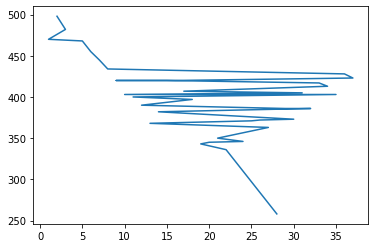

In [48]:
relevant_unemployment_df['week_number'].value_counts().plot()

<AxesSubplot:>

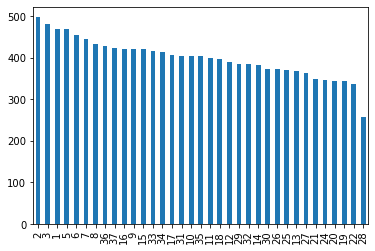

In [49]:
relevant_unemployment_df['week_number'].value_counts().plot.bar()

<AxesSubplot:>

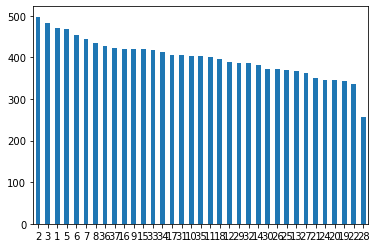

In [50]:
relevant_unemployment_df['week_number'].value_counts().plot.bar(rot=0)

<AxesSubplot:>

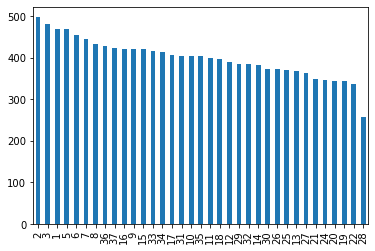

In [51]:
relevant_unemployment_df['week_number'].value_counts().plot.bar()

<AxesSubplot:>

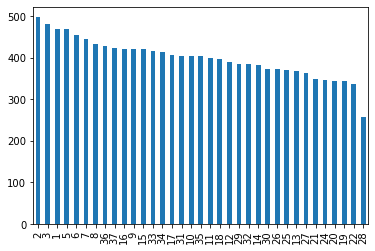

In [52]:
relevant_unemployment_df['week_number'].value_counts().plot.bar(x='Week', y='Count')

<AxesSubplot:>

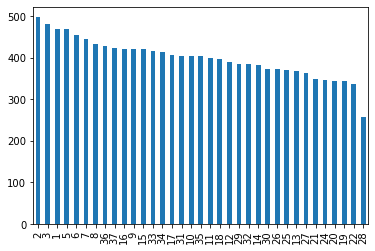

In [53]:
relevant_unemployment_df['week_number'].value_counts().plot.bar()

In [54]:
import os
import pandas
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
import matplotlib.pyplot as plt

TypeError: unhashable type: 'numpy.ndarray'

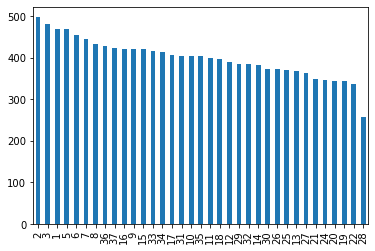

In [55]:
relevant_unemployment_df['week_number'].value_counts().plot.bar()
plt.plot(relevant_unemployment_df)

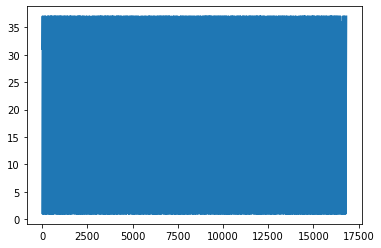

In [56]:
plt.plot(relevant_unemployment_df['week_number'])

In [57]:
relevant_unemployment_df['uu_id'].value_counts().values()

TypeError: 'IntegerArray' object is not callable

In [58]:
relevant_unemployment_df['uu_id'].value_counts()

7b208b710114a393f20ec464c7849157    35
db27f7d84ea8ef691d33dbb715272977    35
b1d41e64e8d10b7c427570a7f77f1826    35
ae2f6787bb01d859420365f1ab55a3c1    35
adf09caf6306aab8015ea16df0efab86    35
                                    ..
b63efd0868b06138b7c8f9da9027e457     5
b67c2c4abede3730932f8d53aba0341a     4
747f8bc2b0c8c0a04d29caa4cfe327d2     4
f7f087af0599e6b2eaa4045ba1a0be50     3
6fbb60a508283bc1fb30c13ac419941a     3
Name: uu_id, Length: 525, dtype: Int64

ValueError: x and y must have same first dimension, but have shapes (13977,) and (35,)

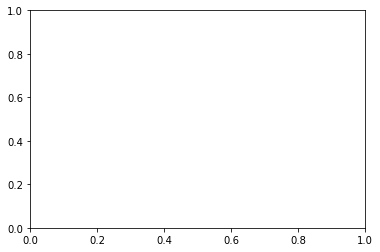

In [59]:
plt.plot(relevant_unemployment_df['week_number'],relevant_unemployment_df['week_number'].value_counts())

In [60]:
relevant_unemployment_df['week_number'].value_counts()

2     498
3     482
1     470
5     468
6     455
7     445
8     434
36    428
37    423
16    420
9     420
15    420
33    417
34    413
17    407
31    405
10    403
35    403
11    400
18    397
12    390
29    386
32    386
14    382
30    373
26    372
25    371
13    368
27    363
21    350
24    346
20    345
19    343
22    336
28    258
Name: week_number, dtype: Int64

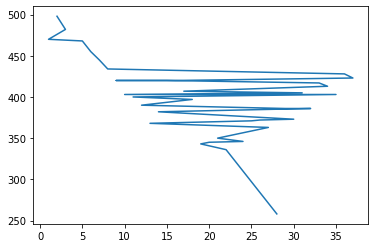

In [61]:
plt.plot(relevant_unemployment_df['week_number'].value_counts())

In [62]:
plt.bar.plot(relevant_unemployment_df['week_number'].value_counts())

AttributeError: 'function' object has no attribute 'plot'

In [63]:
plt.bar(relevant_unemployment_df['week_number'].value_counts())

TypeError: bar() missing 1 required positional argument: 'height'

In [64]:
relevant_unemployment_df.groupby(['week_number'])['week_number'].count()

week_number
1     470
2     498
3     482
5     468
6     455
7     445
8     434
9     420
10    403
11    400
12    390
13    368
14    382
15    420
16    420
17    407
18    397
19    343
20    345
21    350
22    336
24    346
25    371
26    372
27    363
28    258
29    386
30    373
31    405
32    386
33    417
34    413
35    403
36    428
37    423
Name: week_number, dtype: int64

plt.bar(relevant_unemployment_df['week_number'].value_counts())

In [65]:
pd.DataFrame(relevant_unemployment_df.groupby(['week_number'])['week_number'].count())

NameError: name 'pd' is not defined

plt.bar(relevant_unemployment_df['week_number'].value_counts())

In [66]:
import os
import pandas as pd
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
import matplotlib.pyplot as plt

In [67]:
pd.DataFrame(relevant_unemployment_df.groupby(['week_number'])['week_number'].count())

,week_number
week_number,
1,470
2,498
3,482
5,468
6,455
7,445
8,434
9,420
10,403


plt.bar(relevant_unemployment_df['week_number'].value_counts())

<AxesSubplot:xlabel='week_number'>

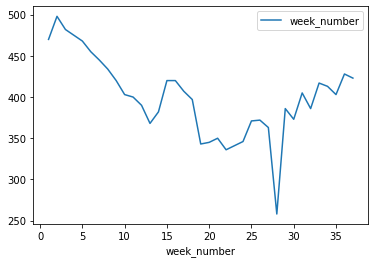

In [76]:
pd.DataFrame(relevant_unemployment_df.groupby(['week_number'])['week_number'].count()).plot()

plt.bar(relevant_unemployment_df['week_number'].value_counts())

In [77]:
pd.DataFrame(relevant_unemployment_df.groupby(['week_number'])['week_number'].count())

,week_number
week_number,
1,470
2,498
3,482
5,468
6,455
7,445
8,434
9,420
10,403


plt.bar(relevant_unemployment_df['week_number'].value_counts())

<AxesSubplot:xlabel='week_number'>

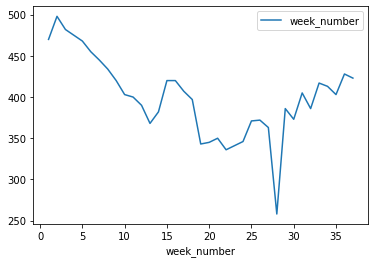

In [78]:
pd.DataFrame(relevant_unemployment_df.groupby(['week_number'])['week_number'].count()).plot()

plt.bar(relevant_unemployment_df['week_number'].value_counts())

In [79]:
pd.DataFrame(relevant_unemployment_df.groupby(['week_number'])['week_number'].count())

,week_number
week_number,
1,470
2,498
3,482
5,468
6,455
7,445
8,434
9,420
10,403


plt.bar(relevant_unemployment_df['week_number'].value_counts())

In [80]:
# Constants
PRED_WEEK = 39

In [81]:
relevant_unemployment_df.columns

Index(['uu_id', 'week_number', 'countyfips', 'tract', 'total_claims',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'wage_data'],
      dtype='object')

In [82]:
type(relevant_unemployment_df.columns)

pandas.core.indexes.base.Index

In [83]:
# Drop duplicate columns
relevant_unemployment_df.drop_duplicates(inplace=True)
relevant_unemployment_df.drop(['timeperiod', 'tract_name'], axis=1, inplace=True)

KeyError: "['timeperiod', 'tract_name'] not found in axis"

In [84]:
# Drop columns with excessive null values
# NOTE: Revisit this, these columns may still be useful, especially those that aren't missing too many values
relevant_unemployment_df.dropna(axis='columns', inplace=True)
relevant_unemployment_df = relevant_unemployment_df.convert_dtypes()
relevant_unemployment_df['countyfips'] = relevant_unemployment_df['countyfips'].astype(str)
relevant_unemployment_df['tract'] = relevant_unemployment_df['tract'].astype(str)
relevant_unemployment_df = relevant_unemployment_df.convert_dtypes()

Add rows such that every uu_id has rows for weeks 1:max(week_number)

In [85]:
# Add Wage data
relevant_unemployment_df['wage_data'] = relevant_unemployment_df['uu_id'].map(wage_data.set_index('uu_id')['average_wage'])
relevant_unemployment_df.info()
bad_wage_uu_ids = list(set(relevant_unemployment_df.loc[relevant_unemployment_df['wage_data'].isna(),'uu_id']))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13977 entries, 0 to 16831
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uu_id                   13977 non-null  string 
 1   week_number             13977 non-null  Int64  
 2   countyfips              13977 non-null  string 
 3   tract                   13977 non-null  string 
 4   total_claims            13977 non-null  Int64  
 5   top_category_employer1  13977 non-null  string 
 6   top_category_employer2  13977 non-null  string 
 7   top_category_employer3  13977 non-null  string 
 8   wage_data               13977 non-null  float64
dtypes: Int64(2), float64(1), string(6)
memory usage: 1.1 MB


In [86]:
relevant_unemployment_df.columns

Index(['uu_id', 'week_number', 'countyfips', 'tract', 'total_claims',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'wage_data'],
      dtype='object')

In [87]:
# Drop duplicate columns
relevant_unemployment_df.drop_duplicates(inplace=True)
# relevant_unemployment_df.drop(['timeperiod', 'tract_name'], axis=1, inplace=True)

In [88]:
# Drop columns with excessive null values
# NOTE: Revisit this, these columns may still be useful, especially those that aren't missing too many values
relevant_unemployment_df.dropna(axis='columns', inplace=True)
relevant_unemployment_df = relevant_unemployment_df.convert_dtypes()
relevant_unemployment_df['countyfips'] = relevant_unemployment_df['countyfips'].astype(str)
relevant_unemployment_df['tract'] = relevant_unemployment_df['tract'].astype(str)
relevant_unemployment_df = relevant_unemployment_df.convert_dtypes()

Add rows such that every uu_id has rows for weeks 1:max(week_number)

In [89]:
# Add Wage data
relevant_unemployment_df['wage_data'] = relevant_unemployment_df['uu_id'].map(wage_data.set_index('uu_id')['average_wage'])
relevant_unemployment_df.info()
bad_wage_uu_ids = list(set(relevant_unemployment_df.loc[relevant_unemployment_df['wage_data'].isna(),'uu_id']))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13977 entries, 0 to 16831
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uu_id                   13977 non-null  string 
 1   week_number             13977 non-null  Int64  
 2   countyfips              13977 non-null  string 
 3   tract                   13977 non-null  string 
 4   total_claims            13977 non-null  Int64  
 5   top_category_employer1  13977 non-null  string 
 6   top_category_employer2  13977 non-null  string 
 7   top_category_employer3  13977 non-null  string 
 8   wage_data               13977 non-null  float64
dtypes: Int64(2), float64(1), string(6)
memory usage: 1.1 MB


In [90]:
list(relevant_unemployment_df.columns)

['uu_id',
 'week_number',
 'countyfips',
 'tract',
 'total_claims',
 'top_category_employer1',
 'top_category_employer2',
 'top_category_employer3',
 'wage_data']

In [91]:
temp_df = pd.DataFrame(columns=list(relevant_unemployment_df.columns))
temp_df

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data


In [92]:
# for uu_id in set(relevant_unemployment_df['uu_id']):
    # for week in range(PRED_WEEK):

In [93]:
relevant_unemployment_df.loc[relevant_unemployment_df.uu_id=="5e819ecea31bac6db64c0ccf48818fa8",]

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data
6632,5e819ecea31bac6db64c0ccf48818fa8,1,18097,310306,23,56,48-49,62,9311.888889
6633,5e819ecea31bac6db64c0ccf48818fa8,2,18097,310306,43,56,62,48-49,9311.888889
6634,5e819ecea31bac6db64c0ccf48818fa8,3,18097,310306,55,81,44-45,42,9311.888889
6635,5e819ecea31bac6db64c0ccf48818fa8,5,18097,310306,45,44-45,56,42,9311.888889
6636,5e819ecea31bac6db64c0ccf48818fa8,6,18097,310306,34,56,62,48-49,9311.888889
6637,5e819ecea31bac6db64c0ccf48818fa8,7,18097,310306,27,56,62,44-45,9311.888889
6638,5e819ecea31bac6db64c0ccf48818fa8,8,18097,310306,35,72,62,56,9311.888889
6639,5e819ecea31bac6db64c0ccf48818fa8,9,18097,310306,24,56,44-45,62,9311.888889
6640,5e819ecea31bac6db64c0ccf48818fa8,10,18097,310306,39,48-49,62,56,9311.888889
6641,5e819ecea31bac6db64c0ccf48818fa8,11,18097,310306,22,56,54,62,9311.888889


In [94]:
relevant_unemployment_df.loc[relevant_unemployment_df.uu_id=="5e819ecea31bac6db64c0ccf48818fa8" & relevant_unemployment_df.week_number == 1,]

TypeError: Cannot perform 'rand_' with a dtyped [int64] array and scalar of type [bool]

In [95]:
relevant_unemployment_df.loc[relevant_unemployment_df.uu_id=="5e819ecea31bac6db64c0ccf48818fa8" and relevant_unemployment_df.week_number == 1,]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [96]:
relevant_unemployment_df.loc[(relevant_unemployment_df.uu_id=="5e819ecea31bac6db64c0ccf48818fa8") and (relevant_unemployment_df.week_number == 1),]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [97]:
relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="5e819ecea31bac6db64c0ccf48818fa8") and (relevant_unemployment_df.week_number == 1)),]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [98]:
relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="5e819ecea31bac6db64c0ccf48818fa8") a&nd (relevant_unemployment_df.week_number == 1)),]

SyntaxError: invalid syntax (1800675154.py, line 1)

In [99]:
relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="5e819ecea31bac6db64c0ccf48818fa8") & (relevant_unemployment_df.week_number == 1)),]

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data
6632,5e819ecea31bac6db64c0ccf48818fa8,1,18097,310306,23,56,48-49,62,9311.888889


In [100]:
relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="5e819ecea31bac6db4c0ccf48818fa8") & (relevant_unemployment_df.week_number == 1)),]

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data


In [101]:
relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="5e819ecea31bac6db64c0ccf48818fa8") & (relevant_unemployment_df.week_number == 1)),]

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data
6632,5e819ecea31bac6db64c0ccf48818fa8,1,18097,310306,23,56,48-49,62,9311.888889


In [102]:
len(relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="5e819ecea31bac6db64c0ccf48818fa8") & (relevant_unemployment_df.week_number == 1)),])

1

In [103]:
len(relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="5edd819ecea31bac6db64c0ccf48818fa8") & (relevant_unemployment_df.week_number == 1)),])

0

In [104]:
len(relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="5e819ecea31bac6db64c0ccf48818fa8") & (relevant_unemployment_df.week_number == 1)),])

1

In [105]:
(relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="5e819ecea31bac6db64c0ccf48818fa8") & (relevant_unemployment_df.week_number == 1)),])

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data
6632,5e819ecea31bac6db64c0ccf48818fa8,1,18097,310306,23,56,48-49,62,9311.888889


In [106]:
row

NameError: name 'row' is not defined

In [107]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id==uu_id) 
                                      & (relevant_unemployment_df.week_number == week)),]
row

NameError: name 'uu_id' is not defined

In [108]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="5e819ecea31bac6db64c0ccf48818fa8") 
                                      & (relevant_unemployment_df.week_number == 1)),]
row

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data
6632,5e819ecea31bac6db64c0ccf48818fa8,1,18097,310306,23,56,48-49,62,9311.888889


In [109]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="5e819ecea31bac6db64c0ccf48818fa8") 
                                      & (relevant_unemployment_df.week_number == 1)),]
row

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data
6632,5e819ecea31bac6db64c0ccf48818fa8,1,18097,310306,23,56,48-49,62,9311.888889


In [110]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="d5e819ecea31bac6db64c0ccf48818fa8") 
                                      & (relevant_unemployment_df.week_number == 1)),]
row

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data


In [111]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="d5e819ecea31bac6db64c0ccf48818fa8") 
                                      & (relevant_unemployment_df.week_number == 1)),]
type(row)

pandas.core.frame.DataFrame

In [112]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="d5e819ecea31bac6db64c0ccf48818fa8") 
                                      & (relevant_unemployment_df.week_number == 1)),]
row

,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data


In [113]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="d5e819ecea31bac6db64c0ccf48818fa8") 
                                      & (relevant_unemployment_df.week_number == 1)),]
row.append([None, None, None, None, None, None, None, None, None])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_2615/219075651.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  row.append([None, None, None, None, None, None, None, None, None])


,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data,0
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
6,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None


In [114]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="d5e819ecea31bac6db64c0ccf48818fa8") 
                                      & (relevant_unemployment_df.week_number == 1)),]
row.concat([None, None, None, None, None, None, None, None, None])

AttributeError: 'DataFrame' object has no attribute 'concat'

In [115]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="d5e819ecea31bac6db64c0ccf48818fa8") 
                                      & (relevant_unemployment_df.week_number == 1)),]
pd.concat(row, [None, None, None, None, None, None, None, None, None])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_2615/3028239011.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat(row, [None, None, None, None, None, None, None, None, None])


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [ ]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="d5e819ecea31bac6db64c0ccf48818fa8") 
                                      & (relevant_unemployment_df.week_number == 1)),]
pd.concat(row, pd.Series([None, None, None, None, None, None, None, None, None]))

In [117]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="d5e819ecea31bac6db64c0ccf48818fa8") 
                                      & (relevant_unemployment_df.week_number == 1)),]
pd.concat(pd.Series(row), pd.Series([None, None, None, None, None, None, None, None, None]))

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [118]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="d5e819ecea31bac6db64c0ccf48818fa8") 
                                      & (relevant_unemployment_df.week_number == 1)),]
pd.append(row, pd.Series([None, None, None, None, None, None, None, None, None]))

AttributeError: module 'pandas' has no attribute 'append'

In [119]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="d5e819ecea31bac6db64c0ccf48818fa8") 
                                      & (relevant_unemployment_df.week_number == 1)),]
row.append(pd.Series([None, None, None, None, None, None, None, None, None]))

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_2615/415037627.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  row.append(pd.Series([None, None, None, None, None, None, None, None, None]))


TypeError: Can only append a Series if ignore_index=True or if the Series has a name

In [120]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="d5e819ecea31bac6db64c0ccf48818fa8") 
                                      & (relevant_unemployment_df.week_number == 1)),]
row.append([None, None, None, None, None, None, None, None, None], columns=row.columns)

TypeError: append() got an unexpected keyword argument 'columns'

In [121]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="d5e819ecea31bac6db64c0ccf48818fa8") 
                                      & (relevant_unemployment_df.week_number == 1)),]
row.append([None, None, None, None, None, None, None, None, None])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_2615/219075651.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  row.append([None, None, None, None, None, None, None, None, None])


,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data,0
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
6,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None


In [122]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="d5e819ecea31bac6db64c0ccf48818fa8") 
                                      & (relevant_unemployment_df.week_number == 1)),]
row.append([None, None, None, None, None, None, None, None, None])
row

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_2615/2177737267.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  row.append([None, None, None, None, None, None, None, None, None])


,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data


In [123]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="d5e819ecea31bac6db64c0ccf48818fa8") 
                                      & (relevant_unemployment_df.week_number == 1)),]
row.append([None, None, None, None, None, None, None, None, None])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_2615/219075651.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  row.append([None, None, None, None, None, None, None, None, None])


,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data,0
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
6,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None


In [124]:
row = relevant_unemployment_df.loc[((relevant_unemployment_df.uu_id=="d5e819ecea31bac6db64c0ccf48818fa8") 
                                      & (relevant_unemployment_df.week_number == 1)),]
row.append([None, None, None, None, None, None, None, None])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_2615/2020497354.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  row.append([None, None, None, None, None, None, None, None])


,uu_id,week_number,countyfips,tract,total_claims,top_category_employer1,top_category_employer2,top_category_employer3,wage_data,0
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
6,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,None
